### Crypto Website Automation

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
# Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '72f476ae-15ca-4651-8193-6c0fc1b3fbfc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-03-05T17:25:34.829Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 10795}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11969, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,date
0,1,Bitcoin,BTC,bitcoin,11969,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983261e+07,1.983261e+07,False,NaN,1,NaN,NaN,None,2025-03-05T17:24:00.000Z,89634.461125,5.855796e+10,-19.4217,1.771259,6.267788,3.108845,-9.362184,-8.357929,-11.178424,1.777685e+12,60.7637,1.882324e+12,None,2025-03-05T17:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 22:55:28.665203,2025-03-05
1,1027,Ethereum,ETH,ethereum,9961,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205925e+08,1.205925e+08,True,NaN,2,NaN,NaN,None,2025-03-05T17:25:00.000Z,2204.774619,2.447089e+10,-35.0855,1.396424,4.495743,-7.957911,-18.437733,-39.206729,-43.758917,2.658792e+11,9.0881,2.658792e+11,None,2025-03-05T17:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 22:55:28.665203,2025-03-05
2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,3,NaN,NaN,None,2025-03-05T17:25:00.000Z,2.480007,7.396009e+09,-45.8785,1.292748,2.717323,10.414727,-6.295342,2.414070,2.626968,1.437158e+11,4.9124,2.480007e+11,None,2025-03-05T17:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 22:55:28.665203,2025-03-05
3,825,Tether USDt,USDT,tether,118373,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.424954e+11,1.445616e+11,True,NaN,4,NaN,NaN,None,2025-03-05T17:23:00.000Z,0.999801,1.058108e+11,-26.0854,-0.003995,-0.063207,0.086567,-0.149385,-0.000268,-0.066516,1.424670e+11,4.8697,1.445328e+11,None,2025-03-05T17:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 22:55:28.665203,2025-03-05
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424757e+08,1.424757e+08,False,NaN,5,NaN,NaN,None,2025-03-05T17:25:00.000Z,592.387370,1.591770e+09,-26.9625,0.388064,3.453235,-3.592521,-0.222979,-16.785177,-19.419197,8.440080e+10,2.8849,8.440080e+10,None,2025-03-05T17:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 22:55:28.665203,2025-03-05
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.079423e+08,5.954361e+08,True,NaN,6,NaN,NaN,None,2025-03-05T17:25:00.000Z,142.728045,5.549559e+09,-39.9302,0.680673,3.045229,4.772314,-31.283203,-33.675906,-40.541109,7.249761e+10,2.4781,8.498544e+10,None,2025-03-05T17:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 22:55:28.665203,2025-03-05
6,3408,USDC,USDC,usd-coin,26059,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.687073e+10,5.687073e+10,False,NaN,7,NaN,NaN,None,2025-03-05T17:23:00.000Z,0.999955,1.067407e+10,-31.1136,0.003876,-0.068201,-0.002948,0.011045,0.002821,0.033600,5.686816e+10,1.9438,5.686816e+10,None,2025-03-05T17:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 22:55:28.665203,2025-03-05
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,None,2025-03-05T17:25:00.000Z,0.961353,4.850636e+09,-11.1680,2.255243,8.275360,43.902653,25.223221,-10.475079,-21.306673,3.385158e+10,1.1571,4.326089e+10,None,2025-03-05T17:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 22:55:28.665203,2025-03-05
8,74,Dogeco

In [4]:
# Creating a function to Automate the process

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '72f476ae-15ca-4651-8193-6c0fc1b3fbfc',
    }
    
    session = Session()
    session.headers.update(headers)
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
    # Appending the data to the dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df2['date'] = df2['timestamp'].dt.strftime('%Y-%m-%d')
    #df = pd.concat([df, df2], ignore_index=False)

    # Transforming the dataframe into a CSV File and then appending data into it
    if not os.path.isfile(r'C:\Users\HP\OneDrive\Desktop\Data Analytics Projects\Crypto Website Automation\CryptoCoinCurrency.csv'):
        df.to_csv(r'C:\Users\HP\OneDrive\Desktop\Data Analytics Projects\Crypto Website Automation\CryptoCoinCurrency.csv',header = True)
    else:
        df.to_csv(r'C:\Users\HP\OneDrive\Desktop\Data Analytics Projects\Crypto Website Automation\CryptoCoinCurrency.csv', mode = 'a', header = False)
    

In [5]:
import os
api_runner()
print("API Runner Invoked")

API Runner Invoked


In [6]:
df3 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Data Analytics Projects\Crypto Website Automation\CryptoCoinCurrency.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,date
0,0,1,Bitcoin,BTC,bitcoin,11963,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.983131e+07,1.983131e+07,False,NaN,1,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,93895.247559,4.610291e+10,24.3572,3.102288,10.207237,-1.865015,-10.214622,0.010799,-1.175005,1.862065e+12,59.6279,1.971800e+12,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
1,1,1027,Ethereum,ETH,ethereum,9954,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205856e+08,1.205856e+08,True,NaN,2,NaN,NaN,NaN,2025-03-02T18:02:00.000Z,2474.411717,2.903343e+10,60.7366,1.482578,12.551280,-12.224118,-26.619182,-25.768208,-30.906461,2.983785e+11,9.5548,2.983785e+11,NaN,2025-03-02T18:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
2,2,52,XRP,XRP,xrp,1543,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,3,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,2.864372,1.364486e+10,290.9948,0.582521,33.657457,11.872741,-6.813014,27.211865,7.592221,1.659896e+11,5.3154,2.864372e+11,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
3,3,825,Tether USDt,USDT,tether,118132,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.424149e+11,1.435642e+11,True,NaN,4,NaN,NaN,NaN,2025-03-02T18:02:00.000Z,1.000489,1.073740e+11,48.2054,0.036219,0.097280,0.040434,0.027057,0.258466,0.051357,1.424846e+11,4.5627,1.436345e+11,NaN,2025-03-02T18:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-02 23:34:52.229356,2025-03-02
4,4,1839,BNB,BNB,bnb,2377,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424760e+08,1.424760e+08,False,NaN,5,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,631.008237,1.962457e+09,14.7009,0.764347,4.085137,-3.408446,-7.661673,-10.340374,-0.349227,8.990350e+10,2.8818,8.990350e+10,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
5,5,5426,Solana,SOL,solana,844,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.075988e+08,5.952864e+08,True,NaN,6,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,170.891921,8.931585e+09,143.7047,-0.566996,22.035380,1.514133,-27.287034,-10.048212,-23.013537,8.674454e+10,2.7778,1.017296e+11,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
6,6,3408,USDC,USDC,usd-coin,25988,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.635819e+10,5.635819e+10,False,NaN,7,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,1.000086,1.067653e+10,63.7168,0.006460,0.023583,0.010910,0.013075,0.007533,0.014702,5.636306e+10,1.8049,5.636306e+10,NaN,2025-03-02T18:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-02 23:34:52.229356,2025-03-02
7,7,2010,Cardano,ADA,cardano,1467,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,1.029690,5.189706e+09,826.1232,-1.426711,62.585780,34.287665,6.852332,16.265222,-12.319023,3.625789e+10,1.1611,4.633607e+10,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
8,8,74

In [7]:
pd.set_option('display.float_format', lambda x: f'{x:.5f}')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,date
0,0,1,Bitcoin,BTC,bitcoin,11963,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19831306.00000,19831306.00000,False,NaN,1,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,93895.24756,46102910676.32648,24.35720,3.10229,10.20724,-1.86502,-10.21462,0.01080,-1.17500,1862065386292.54321,59.62790,1971800198743.51001,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
1,1,1027,Ethereum,ETH,ethereum,9954,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120585638.00638,120585638.00638,True,NaN,2,NaN,NaN,NaN,2025-03-02T18:02:00.000Z,2474.41172,29033433313.57727,60.73660,1.48258,12.55128,-12.22412,-26.61918,-25.76821,-30.90646,298378515590.25482,9.55480,298378515590.25000,NaN,2025-03-02T18:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
2,2,52,XRP,XRP,xrp,1543,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57949738512.00000,99986390660.00000,False,NaN,3,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,2.86437,13644859748.38872,290.99480,0.58252,33.65746,11.87274,-6.81301,27.21187,7.59222,165989603397.15530,5.31540,286437191365.03998,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
3,3,825,Tether USDt,USDT,tether,118132,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,142414921751.05023,143564221721.46112,True,NaN,4,NaN,NaN,NaN,2025-03-02T18:02:00.000Z,1.00049,107373986912.75777,48.20540,0.03622,0.09728,0.04043,0.02706,0.25847,0.05136,142484598148.22440,4.56270,143634460412.81000,NaN,2025-03-02T18:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-02 23:34:52.229356,2025-03-02
4,4,1839,BNB,BNB,bnb,2377,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142475952.11000,142475952.11000,False,NaN,5,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,631.00824,1962456518.80487,14.70090,0.76435,4.08514,-3.40845,-7.66167,-10.34037,-0.34923,89903499313.75243,2.88180,89903499313.75000,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
5,5,5426,Solana,SOL,solana,844,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,507598832.63786,595286428.52011,True,NaN,6,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,170.89192,8931584558.59891,143.70470,-0.56700,22.03538,1.51413,-27.28703,-10.04821,-23.01354,86744539454.79700,2.77780,101729641136.72000,NaN,2025-03-02T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-02 23:34:52.229356,2025-03-02
6,6,3408,USDC,USDC,usd-coin,25988,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,56358188983.96066,56358188983.96066,False,NaN,7,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,1.00009,10676532023.48627,63.71680,0.00646,0.02358,0.01091,0.01308,0.00753,0.01470,56363062116.08761,1.80490,56363062116.09000,NaN,2025-03-02T18:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-02 23:34:52.229356,2025-03-02
7,7,2010,Cardano,ADA,cardano,1467,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35212423444.40199,44994943014.63995,False,NaN,8,NaN,NaN,NaN,2025-03-02T18:03:00.000Z,1.02969,5189706391.37892,826.12320,-1.42671,62.58578

In [17]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.19197,3.43121,-0.03646,-10.26069,-6.33659,-6.70326
Ethereum,0.89322,2.88375,-9.24293,-24.00740,-34.39737,-38.59888
XRP,0.66844,9.36337,11.90824,-7.90584,9.88532,2.85110
Tether USDt,0.01494,0.01222,0.04458,-0.05003,0.08302,-0.03850
BNB,0.44740,0.33028,-3.94673,-5.19859,-15.10599,-13.76194
Solana,0.31347,5.25520,3.31259,-29.91138,-26.03287,-33.72039
USDC,0.00660,-0.00256,0.00985,-0.00408,-0.00179,0.01778
Cardano,0.79454,20.72083,37.20083,12.22711,-5.14847,-20.86809
Dogecoin,0.83977,3.38818,-2.54247,-28.70799,-39.64764,-49.76268


In [18]:
# Pivoting the DataFrame
df5 = df4.stack()
#Converting the Series to DataFrame
df6 = df5.to_frame(name = 'values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h    1.19197
             quote.USD.percent_change_24h   3.43121
             quote.USD.percent_change_7d   -0.03646
             quote.USD.percent_change_30d -10.26069
             quote.USD.percent_change_60d  -6.33659
             quote.USD.percent_change_90d  -6.70326
Ethereum     quote.USD.percent_change_1h    0.89322
             quote.USD.percent_change_24h   2.88375
             quote.USD.percent_change_7d   -9.24293
             quote.USD.percent_change_30d -24.00740
             quote.USD.percent_change_60d -34.39737
             quote.USD.percent_change_90d -38.59888
XRP          quote.USD.percent_change_1h    0.66844
             quote.USD.percent_change_24h   9.36337
             quote.USD.percent_change_7d   11.90824
             quote.USD.percent_change_30d  -7.90584
             quote.USD.percent_change_60d   9.88532
             quote.USD.percent_change_90d   2.85110
Tether USDt  quote.USD.percent_change_1h    0.01494
             quote.USD.percent_change_24h   0.01222
             quote.USD.percent_change_7d    0.04458
             quote.USD.percent_change_30d  -0.05003
             quote.USD.percent_change_60d   0.08302
             quote.USD.percent_change_90d  -0.03850
BNB          quote.USD.percent_change_1h    0.44740
             quote.USD.percent_change_24h   0.33028
             quote.USD.percent_change_7d   -3.94673
             quote.USD.percent_change_30d  -5.19859
             quote.USD.percent_change_60d -15.10599
             quote.USD.percent_change_90d -13.76194
Solana       quote.USD.percent_change_1h    0.31347
             quote.USD.percent_change_24h   5.25520
             quote.USD.percent_change_7d    3.31259
             quote.USD.percent_change_30d -29.91138
             quote.USD.percent_change_60d -26.03287
             quote.USD.percent_change_90d -33.72039
USDC         quote.USD.percent_change_1h    0.00660
             quote.USD.percent_change_24h  -0.00256
             quote.USD.percent_change_7d    0.00985
             quote.USD.percent_change_30d  -0.00408
             quote.USD.percent_change_60d  -0.00179
             quote.USD.percent_change_90d   0.01778
Cardano      quote.USD.percent_change_1h    0.79454
             quote.USD.percent_change_24h  20.72083
             quote.USD.percent_change_7d   37.20083
             quote.USD.percent_change_30d  12.22711
             quote.USD.percent_change_60d  -5.14847
             quote.USD.percent_change_90d -20.86809
Dogecoin     quote.USD.percent_change_1h    0.83977
             quote.USD.percent_change_24h   3.38818
             quote.USD.percent_change_7d   -2.54247
             quote.USD.percent_change_30d -28.70799
             quote.USD.percent_change_60d -39.64764
             quote.USD.percent_change_90d -49.76268
TRON         quote.USD.percent_change_1h    0.01469
             quote.USD.percent_change_24h   1.99803
             quote.USD.percent_change_7d    3.06687
             quote.USD.percent_change_30d   1.30587
             quote.USD.percent_change_60d  -7.84341
             quote.USD.percent_change_90d -13.94155
Hedera       quote.USD.percent_change_1h    0.67763
             quote.USD.percent_change_24h   1.55608
             quote.USD.percent_change_7d   24.62578
             quote.USD.percent_change_30d -10.15363
             quote.USD.percent_change_60d -16.50898
             quote.USD.percent_change_90d -17.14569
Chainlink    quote.USD.percent_change_1h    1.65009
             quote.USD.percent_change_24h   7.52762
             quote.USD.percent_change_7d    1.79855
             quote.USD.percent_change_30d -27.68780
             quote.USD.percent_change_60d -27.68692
             quote.USD.percent_change_90d -31.91993
Stellar      quote.USD.percent_change_1h   -0.11605
             quote.USD.percent_change_24h   2.43969
             quote.USD.percent_change_7d    4.51421
             quote.USD.percent_change_30d

In [19]:
df6.count()

values    138
dtype: int64

In [20]:
index = pd.Index(range(138))  # Creating a new index
df7 = df6.reset_index()  # Reset old index, keeping it as a column
df7.index = index 
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.19197
1,Bitcoin,quote.USD.percent_change_24h,3.43121
2,Bitcoin,quote.USD.percent_change_7d,-0.03646
3,Bitcoin,quote.USD.percent_change_30d,-10.26069
4,Bitcoin,quote.USD.percent_change_60d,-6.33659
5,Bitcoin,quote.USD.percent_change_90d,-6.70326
6,Ethereum,quote.USD.percent_change_1h,0.89322
7,Ethereum,quote.USD.percent_change_24h,2.88375
8,Ethereum,quote.USD.percent_change_7d,-9.24293
9,Ethereum,quote.USD.percent_change_30d,-24.00740


In [21]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.19197
1,Bitcoin,quote.USD.percent_change_24h,3.43121
2,Bitcoin,quote.USD.percent_change_7d,-0.03646
3,Bitcoin,quote.USD.percent_change_30d,-10.26069
4,Bitcoin,quote.USD.percent_change_60d,-6.33659
5,Bitcoin,quote.USD.percent_change_90d,-6.70326
6,Ethereum,quote.USD.percent_change_1h,0.89322
7,Ethereum,quote.USD.percent_change_24h,2.88375
8,Ethereum,quote.USD.percent_change_7d,-9.24293
9,Ethereum,quote.USD.percent_change_30d,-24.00740


In [22]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,1.19197
1,Bitcoin,24h,3.43121
2,Bitcoin,7d,-0.03646
3,Bitcoin,30d,-10.26069
4,Bitcoin,60d,-6.33659
5,Bitcoin,90d,-6.70326
6,Ethereum,1h,0.89322
7,Ethereum,24h,2.88375
8,Ethereum,7d,-9.24293
9,Ethereum,30d,-24.00740


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

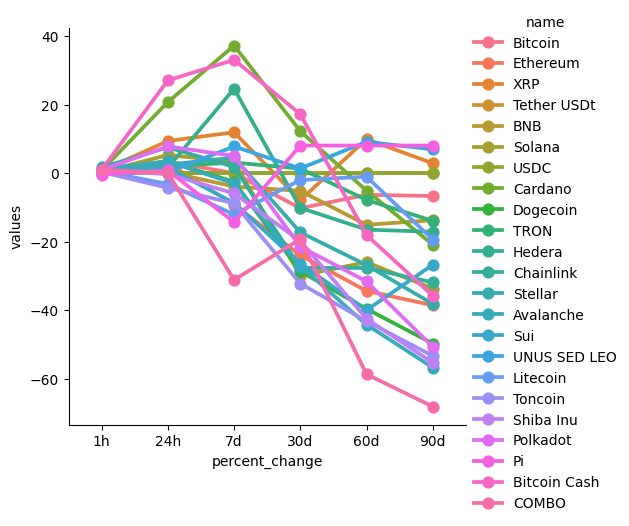

In [24]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [31]:
df9 = df3[['name','quote.USD.price','timestamp','date']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp,date
0,Bitcoin,93895.24756,2025-03-02 23:34:52.229356,2025-03-02
15,Bitcoin,93096.93303,2025-03-03 19:00:22.755193,2025-03-03
35,Bitcoin,83940.69231,2025-03-04 17:03:11.130739,2025-03-04
55,Bitcoin,89561.14489,2025-03-05 22:55:32.863654,2025-03-05
75,Bitcoin,91465.32640,2025-03-06 16:05:57.858244,2025-03-06


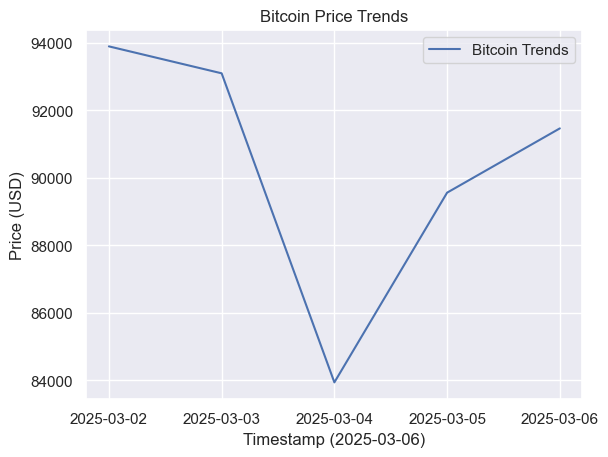

In [33]:
from datetime import datetime
sns.set_theme(style="darkgrid")
sns.lineplot(x='date', y='quote.USD.price', data = df9, label = 'Bitcoin Trends')
today_date = datetime.today().strftime('%Y-%m-%d')
plt.xlabel(f"Timestamp ({today_date})")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Trends")
plt.show()